## Buzz count visualization test
- source 별 groupby count table 구성
- 날짜 조정

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = './Ragm'
flist = os.listdir(path)
print(flist)

['라그나로크mINVEN.csv', '라그나로크m_blogsearch.csv', '라그나로크m_Instagram_hashtag.csv', '라그나로크m_iOS_review.csv', '라그나로크m_navercafe.csv', '라그나로크m_playstore.csv', '라그나로크m_twit.csv']


In [3]:
df1 = pd.read_csv('라그나로크INVEN_mod.csv')
df2 = pd.read_csv('라그나로크m_blogsearch.csv',encoding = 'cp949')
df3 = pd.read_csv('라그나로크m_Instagram_hashtag.csv',encoding = 'cp949')
df4 = pd.read_csv('라그나로크M_navercafe.csv',encoding = 'cp949')
df5 = pd.read_csv('라그나로크m_playstore.csv',encoding = 'cp949')
df6 = pd.read_csv('라그나로크m_twit.csv',encoding = 'cp949')

In [4]:
df1['date'] = pd.to_datetime(df1['date']).dt.date

In [5]:
df2['date'] = df2['postdate'].astype(str)
df2['date'] = pd.to_datetime(df2['postdate'],format="%Y%m%d")

In [6]:
df3['date'] = df3['date'].astype(str)
df3['date'] = pd.to_datetime(df3['date'],format="%Y년 %m월 %d일")

In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
date       1500 non-null object
fulltxt    1500 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [8]:
df4['date'] = pd.to_datetime(df4['date'])
df4['date'] = df4['date'].dt.date

In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148 entries, 0 to 10147
Data columns (total 4 columns):
time          10148 non-null object
review_txt    10148 non-null object
stars_txt     10148 non-null object
ratings       10148 non-null int64
dtypes: int64(1), object(3)
memory usage: 317.2+ KB


In [10]:
df5['date'] = pd.to_datetime(df5['time'])

In [11]:
df5.head()

,time,review_txt,stars_txt,ratings,date
0,2019-06-11,굿,별표 5개 만점에 5개를 받았습니다.,5,2019-06-11
1,2019-06-09,재미있어요. 큰 욕심 부리지 않으면 무과금으로도 충분히 즐길만한 게임이에요. 중국 ...,별표 5개 만점에 5개를 받았습니다.,5,2019-06-09
2,2019-06-08,30~40대의 추억 팔이가 아닌 앞으로도 더더욱 발전하는 라그나로크 게임이 되었스면...,별표 5개 만점에 5개를 받았습니다.,5,2019-06-08
3,2019-06-08,그냥 놀만해요,별표 5개 만점에 4개를 받았습니다.,4,2019-06-08
4,2019-06-08,굿,별표 5개 만점에 4개를 받았습니다.,4,2019-06-08


In [12]:
df6 = pd.read_csv('라그나로크m_twit.csv',encoding = 'cp949')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 2 columns):
twit_text    2180 non-null object
date         2180 non-null object
dtypes: object(2)
memory usage: 34.1+ KB


In [13]:
def tmp(text):
    text_list = text.split('-')
    return text_list[1].strip()
df6['date'] = df6['date'].apply(tmp)

In [14]:
df6['date'] = pd.to_datetime(df6['date'], format="%Y년 %m월 %d일")

In [15]:
tmp_df_list = [df1,df2,df3,df4,df5,df6]
for df in tmp_df_list:
    print(df.columns)

Index(['date', 'text', 'title', 'fulltext'], dtype='object')
Index(['title', 'link', 'description', 'postdate', 'date'], dtype='object')
Index(['hashtags', 'numoflikes', 'date'], dtype='object')
Index(['date', 'fulltxt'], dtype='object')
Index(['time', 'review_txt', 'stars_txt', 'ratings', 'date'], dtype='object')
Index(['twit_text', 'date'], dtype='object')


In [16]:
gp_df1 = df1.groupby(['date'])['fulltext'].count().reset_index()
gp_df2 = df2.groupby(['date'])['description'].count().reset_index()
gp_df3 = df3.groupby(['date'])['hashtags'].count().reset_index()
gp_df4 = df4.groupby(['date'])['fulltxt'].count().reset_index()
gp_df5 = df5.groupby(['date'])['review_txt'].count().reset_index()
gp_df6 = df6.groupby(['date'])['twit_text'].count().reset_index()

In [17]:
tmp_df_list = [gp_df1, gp_df2, gp_df3, gp_df4, gp_df5, gp_df6]
source_list = ['INVEN','Naver blog', 'Instagram',  'Naver cafe', 'Playstore', 'Twitter']

for (source , df) in zip(source_list, tmp_df_list):
    df['source'] = source
    
for df in tmp_df_list:
    df.columns = ['date','cnt', 'source']

In [18]:
total_df = gp_df1
for df in tmp_df_list[1:]:
    total_df = total_df.append(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


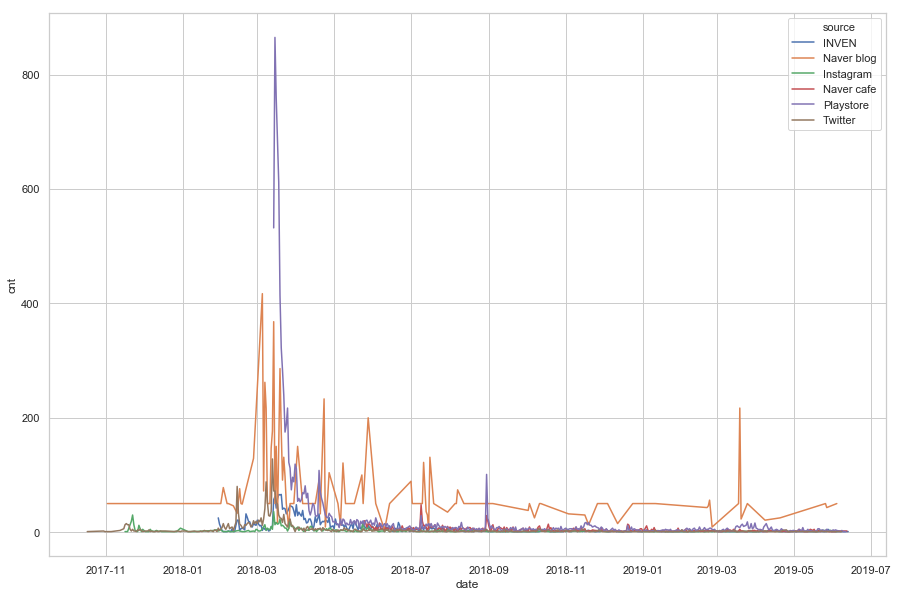

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
sns.lineplot(x="date", y="cnt",
             hue="source",
             data=total_df)

In [37]:
total_df['date'] = pd.to_datetime(total_df['date'])

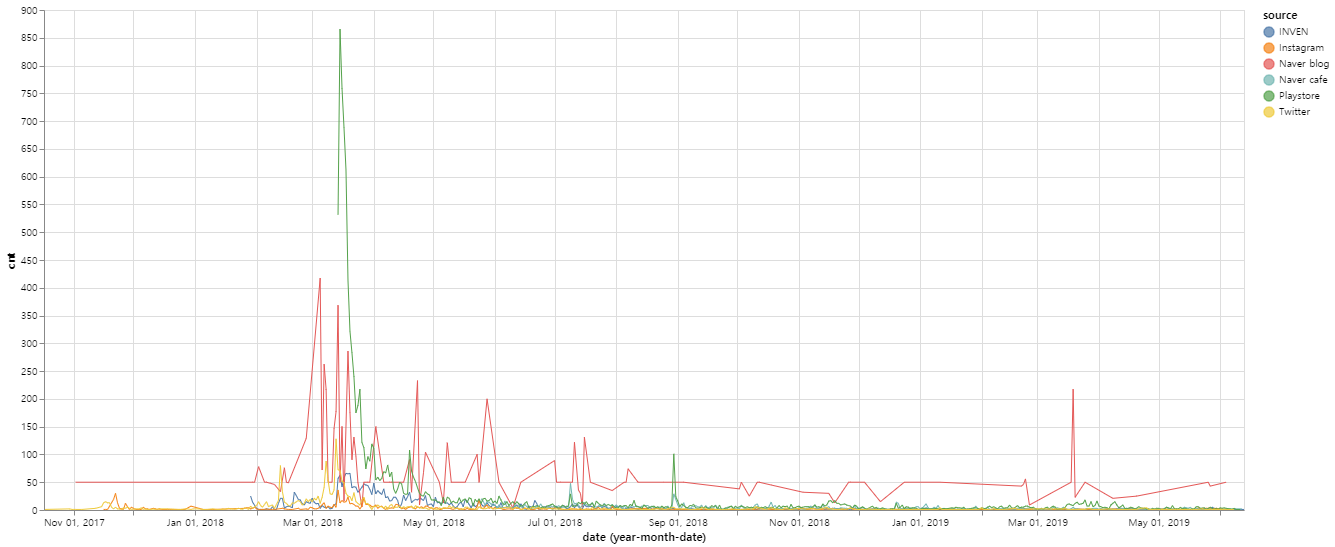

In [41]:
import altair as alt
alt.renderers.enable('jupyterlab')
highlight = alt.selection(type='single', on='mouseover',
                          fields=['source'], nearest=True)

base = alt.Chart(total_df).encode(
    alt.X('yearmonthdate(date)'),
    y='cnt',
    color='source'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=1200,
    height=500
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines

In [46]:
total_df['source'].unique()

array(['INVEN', 'Naver blog', 'Instagram', 'Naver cafe', 'Playstore',
       'Twitter'], dtype=object)

In [47]:
#plotly
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='iris1224', api_key='M5pwguZis4JcUY0OGtOs')

import plotly.graph_objs as go

# Create traces
trace0 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='INVEN','cnt'],
    name = 'INVEN'
)
trace1 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Naver blog','cnt'],
    name = 'Naver blog'
)
trace2 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Instagram','cnt'],
    name = 'Instagram'
)

# Create traces
trace3 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Naver cafe','cnt'],
    name = 'Naver cafe'
)
trace4 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Playstore','cnt'],
    name = 'Playstore'
)
trace5 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Twitter','cnt'],
    name = 'Twitter'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]

py.iplot(data, filename='line-mode')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [55]:
# Create traces
trace0 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='INVEN','cnt'],
    name = 'INVEN',
    mode = 'lines+markers'
)
trace1 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Naver blog','cnt'],
    name = 'Naver blog',
    mode = 'lines+markers'
)
trace2 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Instagram','cnt'],
    name = 'Instagram',
    mode = 'lines+markers'
)

# Create traces
trace3 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Naver cafe','cnt'],
    name = 'Naver cafe',
    mode = 'lines+markers'
)
trace4 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Playstore','cnt'],
    name = 'Playstore',
    mode = 'lines+markers'
)
trace5 = go.Scatter(
    x = total_df['date'],
    y = total_df.loc[total_df['source']=='Twitter','cnt'],
    name = 'Twitter',
    mode = 'lines+markers'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = dict(
    title='Buzz counting',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

